<a href="https://colab.research.google.com/github/manoharvirati/spark_task/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 #Import all required libraries for easy to understand
import pandas as pd
import numpy as np
#import the python libraries matplotlib and seaborn libraries is used for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 #reading the dataset in csv file into dataframed named "Iris"
Iris = pd.read_csv("/content/Iris.csv")

In [4]:
 #reading the dataset in csv file into dataframed named "Iris"
Iris = pd.read_csv("/content/Iris.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


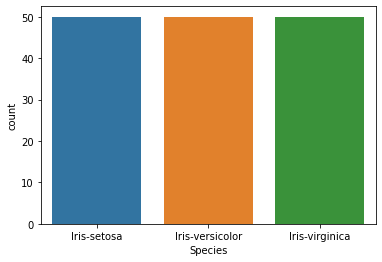

In [5]:
Iris.shape
Iris.info()
Iris.isnull().sum()
sns.countplot(Iris.Species)

In [6]:
X= Iris.iloc[:, [1,2,3,4]].values

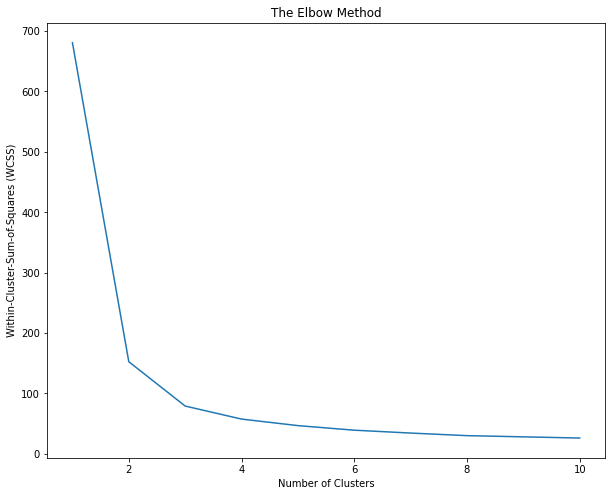

In [7]:
 from sklearn.cluster import KMeans
 
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.xlabel('Number of Clusters')
plt.show()

In [9]:
 clf = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)

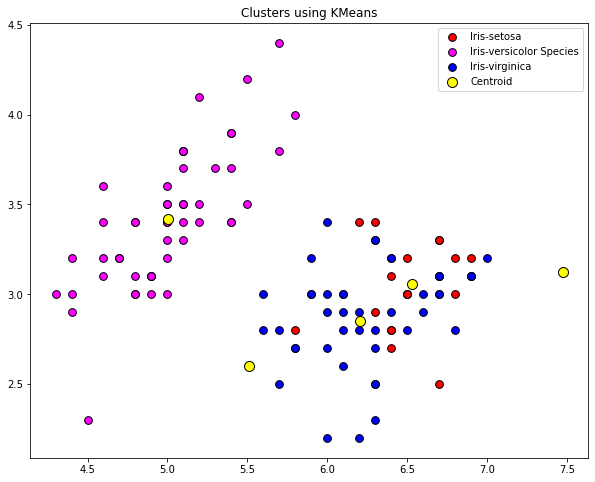

In [10]:
 fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Iris-setosa', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='magenta', s=60, label='Iris-versicolor Species', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue',s=60, label='Iris-virginica', edgecolors='black')
 
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='yellow', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
 
plt.show()

In [11]:
 #giving the no. of clusters in which to combine randomly
model = KMeans(n_clusters = 3,random_state = 5)

In [12]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [13]:
 model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [14]:
 #we cluster according to model.labels_
Iris['Cluster'] = model.labels_ 
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [15]:
 Iris.groupby('Cluster').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Cluster,,,,,
0,87.354839,5.901613,2.748387,4.393548,1.433871
1,25.500000,5.006000,3.418000,1.464000,0.244000
2,121.947368,6.850000,3.073684,5.742105,2.071053
